<a href="https://colab.research.google.com/github/yeneua/HG-MLDL/blob/main/9_3_LSTM%EA%B3%BC_GRU_%EC%85%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# LSTM 신경망 훈련하기

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500) # 어휘사전 500개. 가장 자주 등장하는 단어 500개

In [ ]:
train_input, val_input, train_target, val_target = train_test_split(train_input,train_target, test_size = 0.2, random_state = 42)

In [ ]:
print(train_input.shape, train_target.shape)
print(val_input.shape, val_target.shape)

(20000,) (20000,)
(5000,) (5000,)


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences # 각 샘플의 길이를 100으로
train_seq = pad_sequences(train_input, maxlen = 100)
val_seq = pad_sequences(val_input, maxlen = 100)

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length = 100))
model.add(keras.layers.LSTM(8)) # LSTM
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

# => 8000 = 500*16
# => 800 = 4(16*8 + 8*8 + 8*1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_4 (LSTM)               (None, 8)                 800       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data=(val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 10ms/step - loss: 0.6922 - accuracy: 0.5516 - val_loss: 0.6912 - val_accuracy: 0.5914
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6894 - accuracy: 0.6133 - val_loss: 0.6876 - val_accuracy: 0.6166
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6841 - accuracy: 0.6417 - val_loss: 0.6803 - val_accuracy: 0.6398
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6727 - accuracy: 0.6582 - val_loss: 0.6646 - val_accuracy: 0.6744
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6438 - accuracy: 0.6986 - val_loss: 0.6158 - val_accuracy: 0.7162
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5686 - accuracy: 0.7402 - val_loss: 0.5486 - val_accuracy: 0.7416
Epoch 7/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5321 - accuracy: 0.7542 - val_loss: 0.5270 - val_accuracy: 0.75

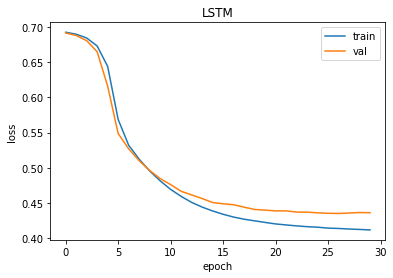

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.title('LSTM')
plt.show()

In [ ]:
# 순환층에 드롭아웃 적용하기

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.LSTM(8, dropout = 0.3)) # dropout 매개변수
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_5 (LSTM)               (None, 8)                 800       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 10ms/step - loss: 0.6925 - accuracy: 0.5333 - val_loss: 0.6918 - val_accuracy: 0.5792
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6902 - accuracy: 0.6041 - val_loss: 0.6889 - val_accuracy: 0.6296
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6860 - accuracy: 0.6444 - val_loss: 0.6830 - val_accuracy: 0.6552
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6758 - accuracy: 0.6627 - val_loss: 0.6658 - val_accuracy: 0.6676
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6381 - accuracy: 0.6899 - val_loss: 0.6009 - val_accuracy: 0.7228
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5826 - accuracy: 0.7327 - val_loss: 0.5664 - val_accuracy: 0.7340
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5541 - accuracy: 0.7425 - val_loss: 0.5421 - val_accuracy: 0.749

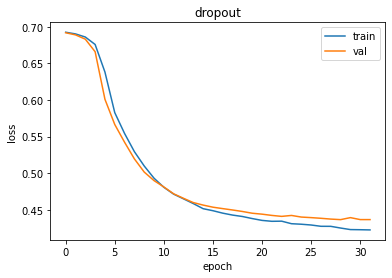

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.title('dropout')
plt.show()

In [ ]:
# 2개의 층을 연결하기

In [ ]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length = 100))
model3.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = True)) # return_sequences = True : 모든 타임스텝의 은닉상태 출력
model3.add(keras.layers.LSTM(8, dropout = 0.3))
model3.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model3.summary()

# 8000 = 500*16
# 800 = 4(16*8 + 8*8 + 8*1)
# 544 = 4(8*8 + 8*8 + 8*1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_6 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_7 (LSTM)               (None, 8)                 544       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model3.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 15ms/step - loss: 0.6930 - accuracy: 0.5062 - val_loss: 0.6928 - val_accuracy: 0.5230
Epoch 2/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6920 - accuracy: 0.5700 - val_loss: 0.6911 - val_accuracy: 0.5708
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6867 - accuracy: 0.5787 - val_loss: 0.6797 - val_accuracy: 0.6354
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6579 - accuracy: 0.6837 - val_loss: 0.6395 - val_accuracy: 0.7136
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6271 - accuracy: 0.7171 - val_loss: 0.6186 - val_accuracy: 0.7164
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6060 - accuracy: 0.7283 - val_loss: 0.5956 - val_accuracy: 0.7338
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5817 - accuracy: 0.7383 - val_loss: 0.5694 - val_accuracy:

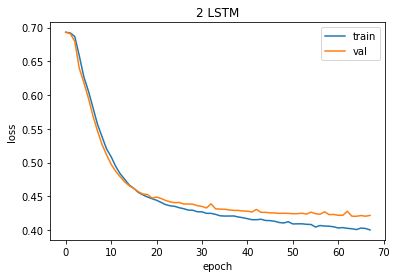

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.title('2 LSTM')
plt.show()

In [ ]:
# GRU 신경망 훈련하기

In [ ]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length = 100))
model4.add(keras.layers.GRU(8)) # GRU
model4.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model4.summary()

# 8000 = 500*16
# 624 = 3(16*8 + 8*8 + 8*1 + 8*1)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru_1 (GRU)                 (None, 8)                 624       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model4.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

In [ ]:
history = model4.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 9ms/step - loss: 0.6928 - accuracy: 0.5253 - val_loss: 0.6924 - val_accuracy: 0.5346
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6917 - accuracy: 0.5570 - val_loss: 0.6911 - val_accuracy: 0.5630
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6895 - accuracy: 0.5876 - val_loss: 0.6885 - val_accuracy: 0.5870
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6855 - accuracy: 0.6149 - val_loss: 0.6833 - val_accuracy: 0.6164
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6782 - accuracy: 0.6348 - val_loss: 0.6745 - val_accuracy: 0.6296
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6654 - accuracy: 0.6502 - val_loss: 0.6587 - val_accuracy: 0.6472
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6429 - accuracy: 0.6677 - val_loss: 0.6295 - val_accuracy: 0.6740

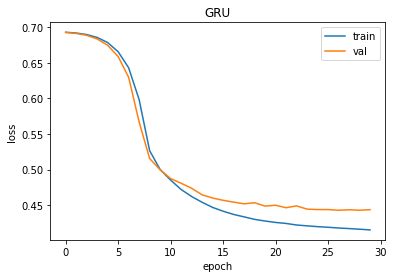

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.title('GRU')
plt.show()

In [ ]:
# LSTM과 GRU 셀로 훈련

In [ ]:
test_seq = pad_sequences(test_input, maxlen = 100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 5s 5ms/step - loss: 0.4167 - accuracy: 0.8061


[0.4167357385158539, 0.8060799837112427]